# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [102]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [103]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [104]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [22]:
df_train.shape

(15223, 52)

In [105]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [23]:
df_test.shape

(14910, 52)

In [10]:
df_train.head()


,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [106]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [107]:
df = df_test.append(df_train).reset_index(drop=True)

In [108]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961 entries, 0 to 14960
Data columns (total 55 columns):
AGE                           14910 non-null float64
AGREEMENT_RK                  14910 non-null float64
AUTO_RUS_FL                   14910 non-null float64
CHILD_TOTAL                   14910 non-null float64
COT_PRESENCE_FL               14910 non-null float64
CREDIT                        14910 non-null object
DEPENDANTS                    14910 non-null float64
DL_DOCUMENT_FL                14910 non-null float64
EDUCATION                     14910 non-null object
FACT_ADDRESS_PROVINCE         14910 non-null object
FACT_LIVING_TERM              14910 non-null float64
FACT_PHONE_FL                 14910 non-null float64
FACT_POST_FL                  14910 non-null float64
FAMILY_INCOME                 14910 non-null object
FL_PRESENCE_FL                14910 non-null float64
FST_PAYMENT                   14910 non-null object
GAR_PRESENCE_FL               14910 non-null flo

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [15]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

ПОЛЕ
set([u'AUTO_RUS_FL', u'CHILD_TOTAL', u'AGE', u'WORK_TIME', u'FL_PRESENCE_FL', u'FACT_LIVING_TERM', u'TP_PROVINCE', u'GPF_DOCUMENT_FL', u'REGION_NM', u'GEN_PHONE_FL', u'REG_ADDRESS_PROVINCE', u'GEN_INDUSTRY', u'FACT_ADDRESS_PROVINCE', u'GENDER', u'ORG_TP_STATE', u'JOB_DIR', u'TERM', u'HS_PRESENCE_FL', u'DEPENDANTS', u'REG_PHONE_FL', u'REG_FACT_POST_FL', u'REG_FACT_FL', u'GAR_PRESENCE_FL', u'PERSONAL_INCOME', u'FST_PAYMENT', u'POSTAL_ADDRESS_PROVINCE', u'LOAN_DLQ_NUM', u'COT_PRESENCE_FL', u'LOAN_MAX_DLQ_AMT', u'MARITAL_STATUS', u'OWN_AUTO', u'LOAN_NUM_PAYM', u'PREVIOUS_CARD_NUM_UTILIZED', u'SOCSTATUS_PENS_FL', u'REG_POST_FL', u'LOAN_NUM_TOTAL', u'LOAN_NUM_CLOSED', u'FACT_POST_FL', u'FAMILY_INCOME', u'LOAN_AVG_DLQ_AMT', u'DL_DOCUMENT_FL', u'SOCSTATUS_WORK_FL', u'GEN_TITLE', u'FACT_PHONE_FL', u'AGREEMENT_RK', u'CREDIT', u'LOAN_MAX_DLQ', u'LAND_PRESENCE_FL', u'ORG_TP_FCAPITAL', u'EDUCATION', u'REG_FACT_POST_TP_FL'])


ОПИСАНИЕ
set([u'\u0441\u0435\u043c\u0435\u0439\u043d\u043e\u0435 \u0

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [109]:
df.info()
# пропуски в данных есть вот в этих столбцах:
#GEN_INDUSTRY                  27420 non-null object
#GEN_TITLE                     27420 non-null object
#ORG_TP_STATE                  27420 non-null object
#ORG_TP_FCAPITAL               27425 non-null object
#JOB_DIR  27420 non-null object
#TP_PROVINCE                   29543 non-null object
#WORK_TIME                     27416 non-null float64
#PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64
# из 30133

df.PREVIOUS_CARD_NUM_UTILIZED.value_counts()

# данные с пропусками:
# заменить пропуски в категориальных признаках пустотами (' ') 
# PREVIOUS_CARD_NUM_UTILIZED - заменить на 0 пропущенные значения, тк
# заполненных всего 600 - это очень мало.
# WORK_TIME - попробуем заполнить пропуски средним значением


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
# категориальные признаки: GEN_INDUSTRY, MARITAL_STATUS, ORG_TP_STATE, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, 
#POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM

# заполнить пропуски в категориальных признаках пустотами ('')
# перекодировать категориальные признаки с помощью get_dummies или OneHotEcncoder

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [110]:
def preproc_data(df_input):
    
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].mean())
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    df_output = df_output.fillna('')
    
    for col in df_output.loc[:, 'EDUCATION':'REGION_NM']:
        df_output[col] = pd.factorize(df_output[col])[0]
        
    df_output = pd.get_dummies(df_output, prefix=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'],
                                   columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    
    return df_output

In [111]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


In [112]:
df_preproc = df.pipe(preproc_data)

In [113]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

#### Задание 5. Обучение и оценка качества разных моделей

In [114]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

X, X_test, y, y_test = train_test_split(df_train_preproc.iloc[:, 1:], df_train_preproc.iloc[:, 0], test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)


In [115]:
dt.fit(X,y)
dt_predict = dt.predict(X_test)
dt_predict_proba = dt.predict_proba(X_test)

In [116]:
rf.fit(X,y)
rf_predict = dt.predict(X_test)
rf_predict_proba = dt.predict_proba(X_test)

In [117]:
lr.fit(X,y)
lr_predict = dt.predict(X_test)
lr_predict_proba = dt.predict_proba(X_test)

In [118]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here


dt_acc = accuracy_score(y_test, dt.predict(X_test))
dt_pr_score = precision_score(y_test, dt.predict(X_test))
dt_recall = recall_score(y_test, dt.predict(X_test))

In [119]:
dt_acc,  dt_pr_score, dt_recall

(0.7880446682723888, 0.13961605584642234, 0.14414414414414414)

In [120]:
rf_acc = accuracy_score(y_test, rf.predict(X_test))
rf_pr_score = precision_score(y_test, rf.predict(X_test))
rf_recall = recall_score(y_test, rf.predict(X_test))

In [121]:
rf_acc,  rf_pr_score, rf_recall

(0.8776001751696957, 0.35714285714285715, 0.009009009009009009)

In [122]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
lr_pr_score = precision_score(y_test, lr.predict(X_test))
lr_recall = recall_score(y_test, lr.predict(X_test))

In [123]:
lr_acc,  lr_pr_score, lr_recall

(0.8780380994088023, 0.25, 0.0018018018018018018)

In [132]:
acc = [dt_acc, rf_acc, lr_acc]
scr = [dt_pr_score, rf_pr_score, lr_pr_score]
recall = [dt_recall, rf_recall, lr_recall]

In [124]:
y_hat_proba_rf = rf.predict_proba(X_test)
y_hat_proba_dt = dt.predict_proba(X_test)
y_hat_proba_lr = lr.predict_proba(X_test)

In [125]:
y_hat_proba_rf 

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.7, 0.3],
       ...,
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ]])

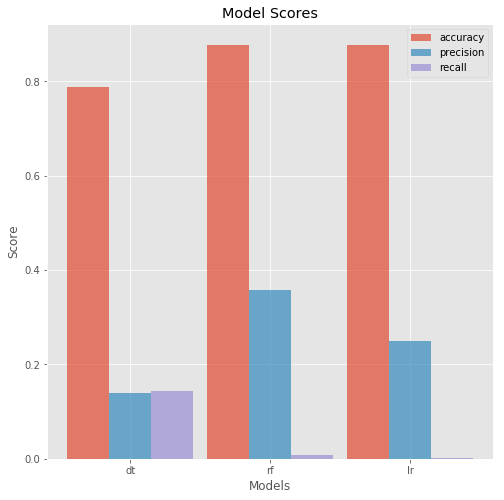

In [137]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
index = np.arange(3)
bar_width = 0.3
alpha = 0.7

plt.figure(figsize=(8, 8))

plt.bar(index, acc, width=bar_width, alpha=alpha, label='accuracy')
plt.bar(index+1.0*bar_width, scr,  width=bar_width, alpha=alpha, label='precision')
plt.bar(index+2.0*bar_width, recall, width=bar_width, alpha=alpha, label='recall')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(index+1.0*bar_width, ['dt', 'rf', 'lr'])
plt.legend()

(-0.01, 1.01)

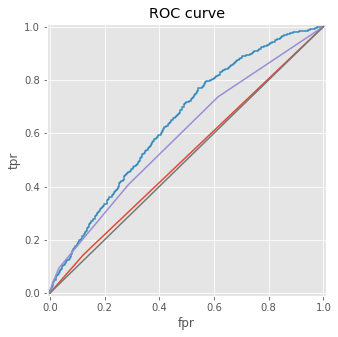

In [126]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

from sklearn.metrics import roc_curve, roc_auc_score

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_hat_proba_dt[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_hat_proba_lr[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_hat_proba_rf[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [152]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# Посчитаем меру качества roc_auc на кросс-валидации для моделей
scores_dt = cross_val_score(
    dt,
    X,
    y,
    scoring='roc_auc',
    cv=cv
)

scores_rf = cross_val_score(
    rf,
    X,
    y,
    scoring='roc_auc',
    cv=cv
)

scores_lr = cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=cv
)

#что-то не получилось пока...

TypeError: 'StratifiedKFold' object is not iterable

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [ ]:
# Померить roc_auc на тесте
